In [1]:
import numpy as np
import random as random
import math
import time
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.io import savemat
from shapely.geometry import Polygon, Point

from Check_Safety import Check_Safety

In [2]:
%matplotlib inline

In [3]:
def rota_rect(state, l, w):
    # Note: the first four states must be x, y, heading, velocity
    x       = state[0]
    y       = state[1]
    box     = [(x - l/2, y + w/2), (x + l/2, y + w/2), (x + l/2, y - w/2), (x - l/2, y - w/2)]
    heading = state[2]
    
    box_matrix = np.array(box) - np.repeat(np.array([[x, y]]), len(box), 0)
    theta = -heading
    rota_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

    new = box_matrix.dot(rota_matrix) + np.repeat(np.array([[x, y]]), len(box), 0)
    
    x = [new[0][0], new[1][0], new[2][0], new[3][0], new[0][0]]
    y = [new[0][1], new[1][1], new[2][1], new[3][1], new[0][1]]
    return x, y

In [4]:
l_veh    = 4.3 # vehicle length, m
w_veh    = 1.8 # vehicle width, m
p        = 8
w_lane   = 4 # lane width
r_round  = 210
x_con_c  = r_round
y_con_c  = -r_round
r_in     = r_round - w_lane + w_veh/2
r_out    = r_round - w_veh/2
margin   = 0.1
Parameters = {'l_veh': l_veh,'w_veh': w_veh,'x_con_c': x_con_c,'y_con_c': y_con_c,'r_in': r_round - w_lane,'r_out': r_round,'p': p,}
Check_Safety = Check_Safety(Params = Parameters)

## Load Data

In [5]:
track_parameters = np.load('track_para.npy', allow_pickle = True).item( )
x_track_c_in = track_parameters['x_track_c_in']
y_track_c_in = track_parameters['y_track_c_in']
x_track_1_in = track_parameters['x_track_1_in']
y_track_1_in = track_parameters['y_track_1_in']
x_track_2_in = track_parameters['x_track_2_in']
y_track_2_in = track_parameters['y_track_2_in']
x_track_3_in = track_parameters['x_track_3_in']
y_track_3_in = track_parameters['y_track_3_in']
x_track_4_in = track_parameters['x_track_4_in']
y_track_4_in = track_parameters['y_track_4_in']
x_track_c_out_viz_1 = track_parameters['x_track_c_out_viz_1']
y_track_c_out_viz_1 = track_parameters['y_track_c_out_viz_1']
x_track_c_out_viz_2 = track_parameters['x_track_c_out_viz_2']
y_track_c_out_viz_2 = track_parameters['y_track_c_out_viz_2']
x_track_c_out_viz_3 = track_parameters['x_track_c_out_viz_3']
y_track_c_out_viz_3 = track_parameters['y_track_c_out_viz_3']
x_track_c_out_viz_4 = track_parameters['x_track_c_out_viz_4']
y_track_c_out_viz_4 = track_parameters['y_track_c_out_viz_4']
x_track_1_out_viz_1 = track_parameters['x_track_1_out_viz_1']
y_track_1_out_viz_1 = track_parameters['y_track_1_out_viz_1']
x_track_1_out_viz_2 = track_parameters['x_track_1_out_viz_2']
y_track_1_out_viz_2 = track_parameters['y_track_1_out_viz_2']
x_track_2_out_viz_1 = track_parameters['x_track_2_out_viz_1']
y_track_2_out_viz_1 = track_parameters['y_track_2_out_viz_1']
x_track_2_out_viz_2 = track_parameters['x_track_2_out_viz_2']
y_track_2_out_viz_2 = track_parameters['y_track_2_out_viz_2']
x_track_3_out_viz_1 = track_parameters['x_track_3_out_viz_1']
y_track_3_out_viz_1 = track_parameters['y_track_3_out_viz_1']
x_track_3_out_viz_2 = track_parameters['x_track_3_out_viz_2']
y_track_3_out_viz_2 = track_parameters['y_track_3_out_viz_2']
x_track_4_out_viz_1 = track_parameters['x_track_4_out_viz_1']
y_track_4_out_viz_1 = track_parameters['y_track_4_out_viz_1']
x_track_4_out_viz_2 = track_parameters['x_track_4_out_viz_2']
y_track_4_out_viz_2 = track_parameters['y_track_4_out_viz_2']

In [6]:
t = np.load('t.npy')

State_SV      = np.load('State_SV.npy')
Control_SV    = np.load('Control_SV.npy', allow_pickle=True)
X_SV_Planning = np.load('X_SV_Planning.npy', allow_pickle = True)
samples_SV    = np.load('samples_SV.npy', allow_pickle = True)

State_EV_P = np.load('State_EV_P.npy')
State_EV_D = np.load('State_EV_D.npy')
State_EV_R = np.load('State_EV_R.npy')
State_EV_SS = np.load('State_EV_SS.npy')
State_EV_SL = np.load('State_EV_SL.npy')

Control_EV_P = np.load('Control_EV_P.npy')
Control_EV_D = np.load('Control_EV_D.npy')
Control_EV_R = np.load('Control_EV_R.npy')
Control_EV_SS = np.load('Control_EV_SS.npy')
Control_EV_SL = np.load('Control_EV_SL.npy')

J_EV_P = np.load('J_EV_P.npy', allow_pickle=True)
J_EV_D = np.load('J_EV_D.npy', allow_pickle=True)
J_EV_R = np.load('J_EV_R.npy', allow_pickle=True)
J_EV_SS = np.load('J_EV_SS.npy', allow_pickle=True)
J_EV_SL = np.load('J_EV_SL.npy', allow_pickle=True)

X_EV_Planning_P  = np.load('X_EV_Planning_P.npy', allow_pickle = True)
X_EV_Planning_D  = np.load('X_EV_Planning_D.npy', allow_pickle = True)
X_EV_Planning_R  = np.load('X_EV_Planning_R.npy', allow_pickle = True)
X_EV_Planning_SS  = np.load('X_EV_Planning_SS.npy', allow_pickle = True)
X_EV_Planning_SL  = np.load('X_EV_Planning_SL.npy', allow_pickle = True)

Flag_P  = np.load('Flag_P.npy', allow_pickle = True)
Flag_D  = np.load('Flag_D.npy', allow_pickle = True)
Flag_R  = np.load('Flag_R.npy', allow_pickle = True)
Flag_SS  = np.load('Flag_SS.npy', allow_pickle = True)
Flag_SL  = np.load('Flag_SL.npy', allow_pickle = True)

Qr_Inv_P       = np.load('Qr_Inv_P.npy', allow_pickle = True)
Qr_Inv_D       = np.load('Qr_Inv_D.npy', allow_pickle = True)
Qr_Inv_R       = np.load('Qr_Inv_R.npy', allow_pickle = True)
Qr_Inv_SS      = np.load('Qr_Inv_SS.npy', allow_pickle = True)
Qr_Inv_SL      = np.load('Qr_Inv_SL.npy', allow_pickle = True)
qr_P   = np.load('qr_P.npy', allow_pickle = True)
qr_D   = np.load('qr_D.npy', allow_pickle = True)
qr_R   = np.load('qr_R.npy', allow_pickle = True)
qr_SS  = np.load('qr_SS.npy', allow_pickle = True)
qr_SL  = np.load('qr_SL.npy', allow_pickle = True)

Qu_P      = np.load('Qu_P.npy', allow_pickle = True)
Qu_SS     = np.load('Qu_SS.npy', allow_pickle = True)
Qu_SL     = np.load('Qu_SL.npy', allow_pickle = True)
qu_P      = np.load('qu_P.npy', allow_pickle = True)
qu_SS     = np.load('qu_SS.npy', allow_pickle = True)
qu_SL     = np.load('qu_SL.npy', allow_pickle = True)

## Compute the Minimal Distance Between EV and SVs by different planners

In [7]:
Min_Dis_SV_P = list( )
Min_Dis_SV_D = list( )
Min_Dis_SV_R = list( )
Min_Dis_SV_SS = list( )
Min_Dis_SV_SL = list( )

Min_Dis_Road_P = list( )
Min_Dis_Road_D = list( )
Min_Dis_Road_R = list( )
Min_Dis_Road_SS = list( )
Min_Dis_Road_SL = list( )

for k in range(len(State_SV[0])):
    Min_Dis_SV_P.append(Check_Safety.check_vehicle_collision(State_EV_P[:, k], State_SV[:, k]))
    Min_Dis_SV_D.append(Check_Safety.check_vehicle_collision(State_EV_D[:, k], State_SV[:, k]))
    Min_Dis_SV_R.append(Check_Safety.check_vehicle_collision(State_EV_R[:, k], State_SV[:, k]))
    Min_Dis_SV_SS.append(Check_Safety.check_vehicle_collision(State_EV_SS[:, k], State_SV[:, k]))
    Min_Dis_SV_SL.append(Check_Safety.check_vehicle_collision(State_EV_SL[:, k], State_SV[:, k]))
    
    Min_Dis_Road_P.append(Check_Safety.check_road_collision(State_EV_P[:, k]))
    Min_Dis_Road_D.append(Check_Safety.check_road_collision(State_EV_D[:, k]))
    Min_Dis_Road_R.append(Check_Safety.check_road_collision(State_EV_R[:, k]))
    Min_Dis_Road_SS.append(Check_Safety.check_road_collision(State_EV_SS[:, k]))
    Min_Dis_Road_SL.append(Check_Safety.check_road_collision(State_EV_SL[:, k]))

## Show the Global Path with Vehicle Shape

Text(0, 0.5, 'y [m]')

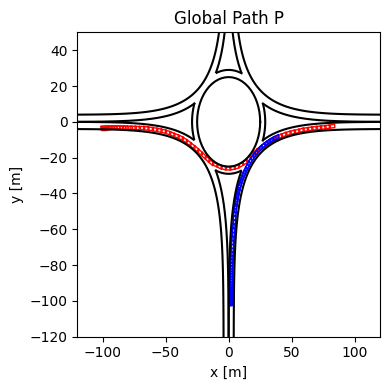

In [8]:
plt.figure(figsize=(4, 4), tight_layout = True)
plt.xlim(-120, 120)
plt.ylim(-120, 50)

for k in range(len(State_SV[0])):
    
    x_SV, y_SV = rota_rect(State_SV[:, k], l_veh, w_veh)
    x_EV, y_EV = rota_rect(State_EV_P[:, k], l_veh, w_veh)

    plt.plot(x_SV, y_SV, c = 'r', linewidth = 1)
    plt.plot(x_EV, y_EV, c = 'b', linewidth = 1)
    
plt.plot(x_track_c_in, y_track_c_in, color = 'k')
plt.plot(x_track_1_in, y_track_1_in, color = 'k')
plt.plot(x_track_2_in, y_track_2_in, color = 'k')
plt.plot(x_track_3_in, y_track_3_in, color = 'k')
plt.plot(x_track_4_in, y_track_4_in, color = 'k')
plt.plot(x_track_c_out_viz_1, y_track_c_out_viz_1, color = 'k')
plt.plot(x_track_c_out_viz_2, y_track_c_out_viz_2, color = 'k')
plt.plot(x_track_c_out_viz_3, y_track_c_out_viz_3, color = 'k')
plt.plot(x_track_c_out_viz_4, y_track_c_out_viz_4, color = 'k')
plt.plot(x_track_1_out_viz_1, y_track_1_out_viz_1, color = 'k')
plt.plot(x_track_1_out_viz_2, y_track_1_out_viz_2, color = 'k')
plt.plot(x_track_2_out_viz_1, y_track_2_out_viz_1, color = 'k')
plt.plot(x_track_2_out_viz_2, y_track_2_out_viz_2, color = 'k')
plt.plot(x_track_3_out_viz_1, y_track_3_out_viz_1, color = 'k')
plt.plot(x_track_3_out_viz_2, y_track_3_out_viz_2, color = 'k')
plt.plot(x_track_4_out_viz_1, y_track_4_out_viz_1, color = 'k')
plt.plot(x_track_4_out_viz_2, y_track_4_out_viz_2, color = 'k')
plt.title("Global Path P")   
plt.xlabel("x [m]")
plt.ylabel("y [m]")

Text(0, 0.5, 'y [m]')

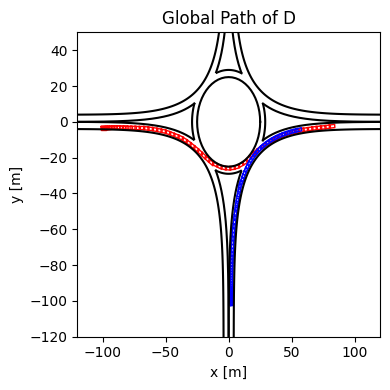

In [9]:
plt.figure(figsize=(4, 4), tight_layout = True)
plt.xlim(-120, 120)
plt.ylim(-120, 50)

for k in range(len(State_SV[0])):
    
    x_SV, y_SV = rota_rect(State_SV[:, k], l_veh, w_veh)
    x_EV, y_EV = rota_rect(State_EV_D[:, k], l_veh, w_veh)
    
    plt.plot(x_SV, y_SV, c = 'r', linewidth = 1)
    plt.plot(x_EV, y_EV, c = 'b', linewidth = 1)
    
plt.plot(x_track_c_in, y_track_c_in, color = 'k')
plt.plot(x_track_1_in, y_track_1_in, color = 'k')
plt.plot(x_track_2_in, y_track_2_in, color = 'k')
plt.plot(x_track_3_in, y_track_3_in, color = 'k')
plt.plot(x_track_4_in, y_track_4_in, color = 'k')
plt.plot(x_track_c_out_viz_1, y_track_c_out_viz_1, color = 'k')
plt.plot(x_track_c_out_viz_2, y_track_c_out_viz_2, color = 'k')
plt.plot(x_track_c_out_viz_3, y_track_c_out_viz_3, color = 'k')
plt.plot(x_track_c_out_viz_4, y_track_c_out_viz_4, color = 'k')
plt.plot(x_track_1_out_viz_1, y_track_1_out_viz_1, color = 'k')
plt.plot(x_track_1_out_viz_2, y_track_1_out_viz_2, color = 'k')
plt.plot(x_track_2_out_viz_1, y_track_2_out_viz_1, color = 'k')
plt.plot(x_track_2_out_viz_2, y_track_2_out_viz_2, color = 'k')
plt.plot(x_track_3_out_viz_1, y_track_3_out_viz_1, color = 'k')
plt.plot(x_track_3_out_viz_2, y_track_3_out_viz_2, color = 'k')
plt.plot(x_track_4_out_viz_1, y_track_4_out_viz_1, color = 'k')
plt.plot(x_track_4_out_viz_2, y_track_4_out_viz_2, color = 'k')
plt.title("Global Path of D")   
plt.xlabel("x [m]")
plt.ylabel("y [m]")

Text(0, 0.5, 'y [m]')

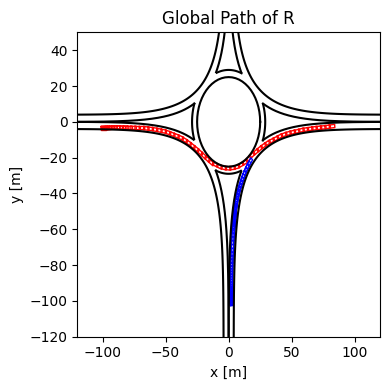

In [10]:
plt.figure(figsize=(4, 4), tight_layout = True)
plt.xlim(-120, 120)
plt.ylim(-120, 50)

for k in range(len(State_SV[0])):
    
    x_SV, y_SV = rota_rect(State_SV[:, k], l_veh, w_veh)
    x_EV, y_EV = rota_rect(State_EV_R[:, k], l_veh, w_veh)

    plt.plot(x_SV, y_SV, c = 'r', linewidth = 1)
    plt.plot(x_EV, y_EV, c = 'b', linewidth = 1)
    
plt.plot(x_track_c_in, y_track_c_in, color = 'k')
plt.plot(x_track_1_in, y_track_1_in, color = 'k')
plt.plot(x_track_2_in, y_track_2_in, color = 'k')
plt.plot(x_track_3_in, y_track_3_in, color = 'k')
plt.plot(x_track_4_in, y_track_4_in, color = 'k')
plt.plot(x_track_c_out_viz_1, y_track_c_out_viz_1, color = 'k')
plt.plot(x_track_c_out_viz_2, y_track_c_out_viz_2, color = 'k')
plt.plot(x_track_c_out_viz_3, y_track_c_out_viz_3, color = 'k')
plt.plot(x_track_c_out_viz_4, y_track_c_out_viz_4, color = 'k')
plt.plot(x_track_1_out_viz_1, y_track_1_out_viz_1, color = 'k')
plt.plot(x_track_1_out_viz_2, y_track_1_out_viz_2, color = 'k')
plt.plot(x_track_2_out_viz_1, y_track_2_out_viz_1, color = 'k')
plt.plot(x_track_2_out_viz_2, y_track_2_out_viz_2, color = 'k')
plt.plot(x_track_3_out_viz_1, y_track_3_out_viz_1, color = 'k')
plt.plot(x_track_3_out_viz_2, y_track_3_out_viz_2, color = 'k')
plt.plot(x_track_4_out_viz_1, y_track_4_out_viz_1, color = 'k')
plt.plot(x_track_4_out_viz_2, y_track_4_out_viz_2, color = 'k')
plt.title("Global Path of R")   
plt.xlabel("x [m]")
plt.ylabel("y [m]")

Text(0, 0.5, 'y [m]')

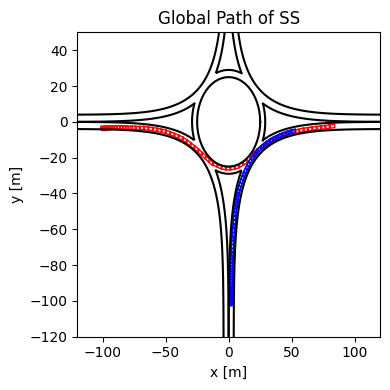

In [11]:
plt.figure(figsize=(4, 4), tight_layout = True)
plt.xlim(-120, 120)
plt.ylim(-120, 50)

for k in range(len(State_SV[0])):
    
    x_SV, y_SV = rota_rect(State_SV[:, k], l_veh, w_veh)
    x_EV, y_EV = rota_rect(State_EV_SS[:, k], l_veh, w_veh)

    plt.plot(x_SV, y_SV, c = 'r', linewidth = 1)
    plt.plot(x_EV, y_EV, c = 'b', linewidth = 1)
    
plt.plot(x_track_c_in, y_track_c_in, color = 'k')
plt.plot(x_track_1_in, y_track_1_in, color = 'k')
plt.plot(x_track_2_in, y_track_2_in, color = 'k')
plt.plot(x_track_3_in, y_track_3_in, color = 'k')
plt.plot(x_track_4_in, y_track_4_in, color = 'k')
plt.plot(x_track_c_out_viz_1, y_track_c_out_viz_1, color = 'k')
plt.plot(x_track_c_out_viz_2, y_track_c_out_viz_2, color = 'k')
plt.plot(x_track_c_out_viz_3, y_track_c_out_viz_3, color = 'k')
plt.plot(x_track_c_out_viz_4, y_track_c_out_viz_4, color = 'k')
plt.plot(x_track_1_out_viz_1, y_track_1_out_viz_1, color = 'k')
plt.plot(x_track_1_out_viz_2, y_track_1_out_viz_2, color = 'k')
plt.plot(x_track_2_out_viz_1, y_track_2_out_viz_1, color = 'k')
plt.plot(x_track_2_out_viz_2, y_track_2_out_viz_2, color = 'k')
plt.plot(x_track_3_out_viz_1, y_track_3_out_viz_1, color = 'k')
plt.plot(x_track_3_out_viz_2, y_track_3_out_viz_2, color = 'k')
plt.plot(x_track_4_out_viz_1, y_track_4_out_viz_1, color = 'k')
plt.plot(x_track_4_out_viz_2, y_track_4_out_viz_2, color = 'k')
plt.title("Global Path of SS")   
plt.xlabel("x [m]")
plt.ylabel("y [m]")

Text(0, 0.5, 'y [m]')

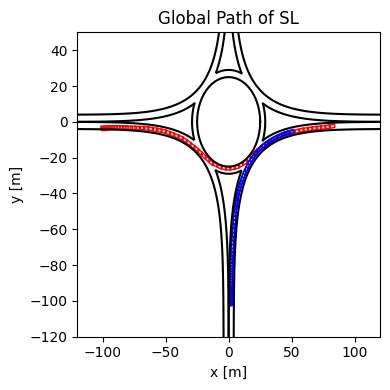

In [12]:
plt.figure(figsize=(4, 4), tight_layout = True)
plt.xlim(-120, 120)
plt.ylim(-120, 50)

for k in range(len(State_SV[0])):
    
    x_SV, y_SV = rota_rect(State_SV[:, k], l_veh, w_veh)
    x_EV, y_EV = rota_rect(State_EV_SL[:, k], l_veh, w_veh)

    plt.plot(x_SV, y_SV, c = 'r', linewidth = 1)
    plt.plot(x_EV, y_EV, c = 'b', linewidth = 1)
    
plt.plot(x_track_c_in, y_track_c_in, color = 'k')
plt.plot(x_track_1_in, y_track_1_in, color = 'k')
plt.plot(x_track_2_in, y_track_2_in, color = 'k')
plt.plot(x_track_3_in, y_track_3_in, color = 'k')
plt.plot(x_track_4_in, y_track_4_in, color = 'k')
plt.plot(x_track_c_out_viz_1, y_track_c_out_viz_1, color = 'k')
plt.plot(x_track_c_out_viz_2, y_track_c_out_viz_2, color = 'k')
plt.plot(x_track_c_out_viz_3, y_track_c_out_viz_3, color = 'k')
plt.plot(x_track_c_out_viz_4, y_track_c_out_viz_4, color = 'k')
plt.plot(x_track_1_out_viz_1, y_track_1_out_viz_1, color = 'k')
plt.plot(x_track_1_out_viz_2, y_track_1_out_viz_2, color = 'k')
plt.plot(x_track_2_out_viz_1, y_track_2_out_viz_1, color = 'k')
plt.plot(x_track_2_out_viz_2, y_track_2_out_viz_2, color = 'k')
plt.plot(x_track_3_out_viz_1, y_track_3_out_viz_1, color = 'k')
plt.plot(x_track_3_out_viz_2, y_track_3_out_viz_2, color = 'k')
plt.plot(x_track_4_out_viz_1, y_track_4_out_viz_1, color = 'k')
plt.plot(x_track_4_out_viz_2, y_track_4_out_viz_2, color = 'k')
plt.title("Global Path of SL")   
plt.xlabel("x [m]")
plt.ylabel("y [m]")

In [16]:
print('min dis EV SV of P is', np.min(Min_Dis_SV_P))
print('min dis EV SV of D is', np.min(Min_Dis_SV_D))
print('min dis EV SV of R is', np.min(Min_Dis_SV_R))
print('min dis EV SV of SS is', np.min(Min_Dis_SV_SS))
print('min dis EV SV of SL is', np.min(Min_Dis_SV_SL))

print('P: num. of collision with road', np.sum(Min_Dis_Road_P))
print('D: num. of collision with road', np.sum(Min_Dis_Road_D))
print('R: num. of collision with road', np.sum(Min_Dis_Road_R))
print('SS: num. of collision with road', np.sum(Min_Dis_Road_SS))
print('SL: num. of collision with road', np.sum(Min_Dis_Road_SL))


print('P: num. of using backup control', np.sum(Flag_P))
print('D: num. of using backup control', np.sum(Flag_D))
print('R: num. of using backup control', np.sum(Flag_R))
print('SS: num. of using backup control', np.sum(Flag_SS))
print('SL: num. of using backup control', np.sum(Flag_SL))

min dis EV SV of P is 10.964515397349514
min dis EV SV of D is 3.079209202195353
min dis EV SV of R is 24.822001897446437
min dis EV SV of SS is 7.693295609012494
min dis EV SV of SL is 8.438292182994857
P: num. of collision with road 0
D: num. of collision with road 0
R: num. of collision with road 0
SS: num. of collision with road 0
SL: num. of collision with road 0
P: num. of using backup control 0
D: num. of using backup control 2
R: num. of using backup control 1
SS: num. of using backup control 1
SL: num. of using backup control 1
